# [Week7] 이미지 분석 활용 맛보기

* 과제
    * 문제 1번을 풀어주세요.
    * `2~3번`의 각 실행 코드를 실행해보며, 자신이 이해하기 편하도록 코드를 분석하여 `주석`을 달아주세요.
    * `4번`의 맨 마지막 실습은 `직접 코드를 작성`해주세요.

## 1. 라이브러리 설치

### (1) cvlib : 객체인식, 얼굴인식, 성별인식

* 참고 링크 : [cvlib docs](https://docs.cvlib.net/)
* 혹시 아래 라이브러리를 설치하다가 버전 문제가 생길 때(특히 tensorflow), 해결하기 가장 쉬운 방법은 다음과 같습니다.
    * 주피터 노트북에서 새로운 가상환경을 만들기
    * 모든 라이브러리를 최신 버전으로 다시 다운 받기 (numpy 버전과 tensorflow 버전을 호환되게 맞추기)

In [1]:
# CVlib
!pip install cvlib

  Created wheel for cvlib: filename=cvlib-0.2.5-py3-none-any.whl size=10044210 sha256=ac56d7ecfbc4eb15f7e7a3ef840e78c1a85e4dacf27ef6967231aacc5c7a7d15
  Stored in directory: c:\users\sm-pc\appdata\local\pip\cache\wheels\a8\8b\78\d0ae9aa22f0efb2ac44feb35ce4cf09bdae5adb37b9723fa76
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12078 sha256=5336e8901953b11103b5711324a804dd3c6080fbe905f3106bdf6525710bd5cd
  Stored in directory: c:\users\sm-pc\appdata\local\pip\cache\wheels\2c\67\ed\d84123843c937d7e7f5ba88a270d11036473144143355e2747
  Created wheel for imutils: filename=imutils-0.5.3-py3-none-any.whl size=25856 sha256=f1dd085caa2a521bf9c16eafbfe29f32436738880d6c61d7572664b76ce7def4
  Stored in directory: c:\users\sm-pc\appdata\local\pip\cache\wheels\c8\d6\0f\b0c3892b70c59f0d202f8619a449f7d14cb839a0af2f943869
Successfully built cvlib progressbar imutils


In [2]:
# tensorflow
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=e8655888379f0517fb4a5d6f15cdf73da65a652ec712a0aa03a8ad278cf01873
  Stored in directory: c:\users\sm-pc\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor


In [3]:
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
import numpy as np

> __문제 1번 : cvlib 이용 시 매개변수로 넣는 이미지의 기본 컬러공간(color space)은 무엇이어야 할까요?__

* 답변 : BGR

## 2. 라이브러리 사용 실습

* 참고 링크 : https://github.com/arunponnusamy/cvlib

### 2-1. 객체인식(Object Detection)

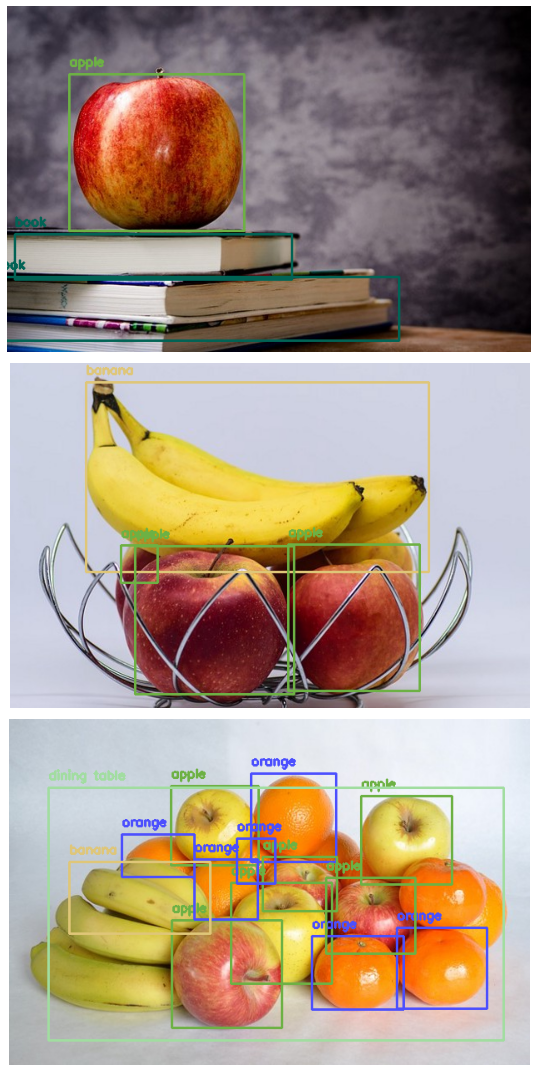

In [4]:
fig = plt.figure(figsize=(15,15)) # 이미지 사이즈
for i in range(1, 4):
    image_path = './image/image'+ str(i) +'.jpeg' # 이미지 경로
    im = cv2.imread(image_path) # 이미지 가져오기
    
    bbox, label, conf = cv.detect_common_objects(im) # 객체 인식: 객체 인식하여 테두리 박스 생성, 인식한 객체 label, 확실성 리턴
    
    output_image = draw_bbox(im, bbox, label, conf) # 이미지에 같이 나타냄
    output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB) # 컬러공간 변환
    
    plt.subplot(3, 1, i)
    plt.imshow(output_image)
    plt.axis('off')
plt.tight_layout()
plt.show()

### 2-2. 얼굴인식(Face Detection)

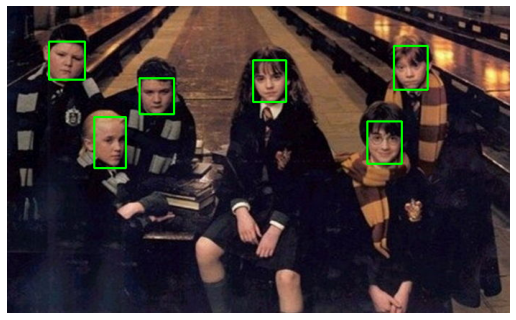

In [5]:
fig = plt.figure(figsize=(9,9))
image_path = './image/harrypotter.jpg'
im = cv2.imread(image_path)

faces, confidences = cv.detect_face(im) # 얼굴 인식: 얼굴 인식하여 테두리 박스 생성, 확실성 리턴
for face in faces:
    (startX,startY) = face[0],face[1] # 좌상단
    (endX,endY) = face[2],face[3] # 우하단
    cv2.rectangle(im, (startX,startY), (endX,endY), (0,255,0), 2) # 사각형 그림

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.axis('off')
plt.show()

### 2-3. 성별인식(Gender Detection)

45654016/45649168 [==============================] - 7s 0us/step
[INFO] Initializing gender detection model ..


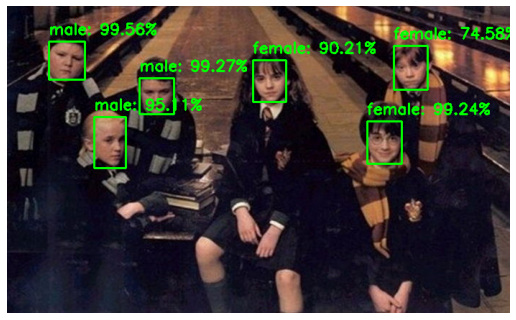

In [6]:
fig = plt.figure(figsize=(9,9))
image_path = './image/harrypotter.jpg'
im = cv2.imread(image_path)

faces, confidences = cv.detect_face(im) # 얼굴 인식: 얼굴 인식하여 테두리 박스 생성, 확실성 리턴
for face in faces:
    (startX,startY) = face[0],face[1] # 좌상단
    (endX,endY) = face[2],face[3] # 우하단
    
    face_crop = np.copy(im[startY:endY, startX:endX])
    
    (label, confidence) = cv.detect_gender(face_crop) # 남자/여자 label, 확실성 리턴

    idx = np.argmax(confidence) # 남자/여자 중 확률이 높은 것으로 선택
    label = label[idx]
    label = "{}: {:.2f}%".format(label, confidence[idx] * 100)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    cv2.rectangle(im, (startX,startY), (endX,endY), (0,255,0), 2)
    cv2.putText(im, label, (startX,Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                (0,255,0), 2)

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.axis('off')
plt.show()

## 3. 웹캠 입출력

In [7]:
webcam = cv2.VideoCapture(0) # 웹캠 연결

if not webcam.isOpened():
    print("Could not open webcam")
    exit()

while webcam.isOpened():
    status, frame = webcam.read()

    if not status:
        print("Could not read frame")
        exit()

    frame = cv2.flip(frame, 1)
    cv2.imshow("Real-time video", frame) # 웹캠 영상 나타내기

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

webcam.release()
cv2.destroyAllWindows()

## 4. 나만의 프로그램 만들기 (직접 코드 작성)

* 실습 내용 : `웹캠 입출력`과 `객체인식 or 얼굴인식+성별인식` 코드를 합친 코드를 작성하세요.
    * 후보1 : 웹캠 입출력 + 객체인식 프로그램
    * 후보2 : 웹캠 입출력 + 얼굴인식+성별인식 프로그램

* 나의 선택 : 후보 ( 1 ) 번

In [8]:
# 직접 코드 작성

webcam = cv2.VideoCapture(0) # 웹캠 연결

if not webcam.isOpened():
    print("Could not open webcam")
    exit()

while webcam.isOpened():
    status, frame = webcam.read()

    if not status:
        print("Could not read frame")
        exit()

    frame = cv2.flip(frame, 1)
    
    bbox, label, conf = cv.detect_common_objects(frame) # 객체 인식: 객체 인식하여 테두리 박스 생성, 인식한 객체 label, 확실성 리턴
    
    frame = draw_bbox(frame, bbox, label, conf) # 이미지에 같이 나타냄

    cv2.imshow("Real-time video", frame) # 웹캠 영상 나타내기

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

webcam.release()
cv2.destroyAllWindows()